In [4]:
import pandas as pd

# Зчитайте CSV-файл
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\final.csv"
df = pd.read_csv(file_path)


In [11]:
import pandas as pd

# Припустимо, що df містить ваші дані
# Зчитайте свій CSV або використовуйте df_loaded, який ви отримали раніше

# Перетворення стовпця дати в об'єкт типу datetime
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Групування за group_id і розрахунок розбросу по часу
result = df.groupby('group_id')['acq_date'].apply(lambda x: (x.max() - x.min()).days).reset_index(name='time_spread')

# Сортування за кількістю днів
result = result.sort_values(by='time_spread', ascending=False)

# Встановлення параметрів виведення Pandas для виведення всіх рядків і стовпців
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Виведення результату у вигляді таблиці
print(result)

      group_id  time_spread
0         -1.0          530
512     3907.0           50
2383   16217.0           36
2310   14817.0           30
2391   16453.0           27
2425   16910.0           26
735     5882.0           21
714     5671.0           20
1947   12115.0           20
2478   17400.0           17
1669   11267.0           16
2610   18454.0           13
2387   16399.0           13
797     6566.0           13
700     5515.0           13
1173    8130.0           12
121      630.0           12
2770   19717.0           12
2626   18537.0           12
2761   19655.0           11
1160    8029.0           11
2619   18506.0           11
2930   21012.0           11
688     5398.0           11
645     4953.0           10
1965   12183.0           10
730     5781.0           10
2188   13013.0           10
410     3330.0           10
681     5333.0           10
2293   14382.0           10
2776   19733.0            9
2571   18026.0            9
2465   17280.0            9
2605   18373.0      

In [21]:
import pandas as pd

# Припустимо, що df містить ваші дані
# Зчитайте свій CSV або використовуйте df_loaded, який ви отримали раніше

# Додайте колонку 'time_spread' до початкового DataFrame df
df = pd.merge(df, result[['group_id', 'time_spread']], on='group_id', how='left')

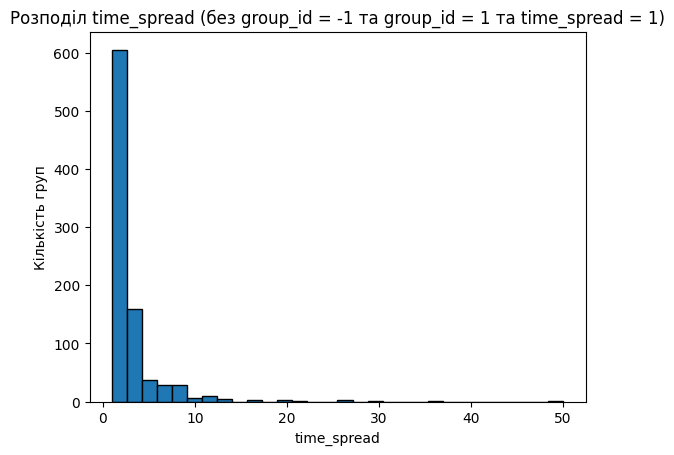

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Припустимо, що df містить ваші дані
# Зчитайте свій CSV або використовуйте df_loaded, який ви отримали раніше

# Перетворення стовпця дати в об'єкт типу datetime
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Групування за group_id і розрахунок розбросу по часу
result = df.groupby('group_id')['acq_date'].apply(lambda x: (x.max() - x.min()).days).reset_index(name='time_spread')
df_filtered = df[df['group_id'] != -1]
# Вилучення рядків, де time_spread дорівнює 1
result_filtered = result[result['time_spread'] != 0]
result_filtered = result_filtered[result_filtered['group_id'] != -1]
# Сортування за кількістю днів
result_filtered = result_filtered.sort_values(by='time_spread', ascending=False)

# Виведення гістограми
plt.hist(result_filtered['time_spread'], bins=30, edgecolor='black')
plt.title('Розподіл time_spread (без group_id = -1 та group_id = 1 та time_spread = 1)')
plt.xlabel('time_spread')
plt.ylabel('Кількість груп')
plt.show()

In [22]:
print(df.head())

   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0   44.7493    16.4361       311.6   1.4    1.2 2021-05-02      1216   
1   56.8468     8.2722       334.6   1.0    1.0 2021-03-08      1214   
2   49.2377     6.8459       304.2   1.2    1.1 2021-03-08      1212   
3   45.9517    13.4002       303.2   1.0    1.0 2021-03-08      1211   
4   45.1215    17.0005       300.6   1.2    1.1 2021-03-08      1210   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0      Aqua      MODIS          56     6.03       297.9  10.0        D     0   
1      Aqua      MODIS           0     6.03       283.4  38.7        D     0   
2      Aqua      MODIS          58     6.03       282.2  10.8        D     2   
3      Aqua      MODIS          55     6.03       289.3   4.4        D     0   
4      Aqua      MODIS          39     6.03       288.3   5.3        D     0   

      id  group_id  time_spread_x  time_spread_y  time_spread  
0  56360      -1.0    

In [36]:
#df = df.drop(['time_spread_x', 'time_spread_y'], axis=1)

# Вибрати пожежі, що відповідають умовам
selected_fires = df[(df['time_spread'] < 14) & (df['time_spread'] > 1)]

# Вивести вибрані пожежі
print(selected_fires)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
csv_output_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires.csv"
selected_fires.to_csv(csv_output_path, index=False)

In [7]:
import pandas as pd

# Завантаження файла selected_fires.csv
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires.csv"
selected_fires = pd.read_csv(file_path)

# Перетворення стовпця дати в об'єкт типу datetime без вказання формату
selected_fires['acq_date'] = pd.to_datetime(selected_fires['acq_date'])

# Групування за group_id і розрахунок номера дня для кожної групи
selected_fires['day_number'] = selected_fires.groupby('group_id')['acq_date'].rank(method='dense', ascending=True).astype(int)

# Додавання мінусу до останнього дня
selected_fires['max_day'] = selected_fires.groupby('group_id')['day_number'].transform('max')
selected_fires['day_number'] = selected_fires.apply(lambda row: -row['day_number'] if not pd.isna(row['max_day']) and row['day_number'] == row['max_day'] else row['day_number'], axis=1)
selected_fires.drop('max_day', axis=1, inplace=True)

# Виведення результату
print(selected_fires)

       latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0       47.8759    33.4427       314.5   1.2    1.1 2020-06-29      2342   
1       46.7231    32.8368       317.4   3.8    1.8 2020-07-01       950   
2       47.8695    33.3934       323.4   1.1    1.1 2020-06-30       907   
3       47.8741    33.4588       317.0   1.2    1.1 2020-06-29      2342   
4       48.5109    34.7954       319.4   1.3    1.1 2020-06-30       906   
...         ...        ...         ...   ...    ...        ...       ...   
20532   51.4906     6.7493       301.3   1.4    1.2 2021-12-09       215   
20533   51.4832     6.7218       304.5   1.8    1.3 2021-12-10      2150   
20534   51.4885     6.7154       300.7   1.8    1.3 2021-12-10      2150   
20535   51.4883     6.7187       303.1   1.1    1.0 2021-12-11       203   
20536   51.4860     6.7129       307.2   1.3    1.1 2021-12-11      2055   

      satellite instrument  confidence  version  bright_t31   frp daynight  \
0        

In [9]:
csv_output_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_day.csv"
selected_fires.to_csv(csv_output_path, index=False)

In [27]:
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_day.csv"
selected_fires = pd.read_csv(file_path)

In [29]:
# Припустимо, що ви вже маєте датафрейм selected_fires

# Додаємо новий стовпець 'is_day_last' і заповнюємо його значеннями згідно з умовою
selected_fires['is_day_last'] = 0
selected_fires.loc[selected_fires['day_number'] < 0, 'is_day_last'] = 1

# Беремо модуль від'ємних значень у стовпці 'day_number'
selected_fires['day_number'] = selected_fires['day_number'].abs()

# Зберігаємо оновлений датафрейм у CSV-файл
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_day_last.csv"
selected_fires.to_csv(file_path, index=False)
print(selected_fires)

       latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0       47.8759    33.4427       314.5   1.2    1.1  2020-06-29      2342   
1       46.7231    32.8368       317.4   3.8    1.8  2020-07-01       950   
2       47.8695    33.3934       323.4   1.1    1.1  2020-06-30       907   
3       47.8741    33.4588       317.0   1.2    1.1  2020-06-29      2342   
4       48.5109    34.7954       319.4   1.3    1.1  2020-06-30       906   
...         ...        ...         ...   ...    ...         ...       ...   
20532   51.4906     6.7493       301.3   1.4    1.2  2021-12-09       215   
20533   51.4832     6.7218       304.5   1.8    1.3  2021-12-10      2150   
20534   51.4885     6.7154       300.7   1.8    1.3  2021-12-10      2150   
20535   51.4883     6.7187       303.1   1.1    1.0  2021-12-11       203   
20536   51.4860     6.7129       307.2   1.3    1.1  2021-12-11      2055   

      satellite instrument  confidence  version  bright_t31   frp daynight 

In [30]:
import pandas as pd
from scipy.spatial.distance import cdist
from datetime import timedelta

# Завантаження файла selected_fires.csv
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires.csv"
selected_fires = pd.read_csv(file_path)

# Перетворення стовпця дати в об'єкт типу datetime без вказання формату
selected_fires['acq_date'] = pd.to_datetime(selected_fires['acq_date'])

# Групування за group_id і розрахунок номера дня для кожної групи
selected_fires['day_number'] = selected_fires.groupby('group_id')['acq_date'].rank(method='dense', ascending=True).astype(int)

# Для кожного запису, де day_number > 0
selected_fires['nearest'] = None  # Додаємо стовпець 'nearest'

for index, row in selected_fires[selected_fires['day_number'] > 0].iterrows():
    current_location = row[['latitude', 'longitude']].astype(float).values.reshape(1, -1)
    current_date = row['acq_date']

    # Вибір записів для наступного дня з того самого класу
    next_day_data = selected_fires[(selected_fires['group_id'] == row['group_id']) & (selected_fires['acq_date'] == current_date + timedelta(days=1))]

    # Якщо є записи на наступний день
    if not next_day_data.empty:
        next_day_locations = next_day_data[['latitude', 'longitude']].astype(float).values

        # Знаходження найближчого за відстанню
        distances = cdist(current_location, next_day_locations)
        nearest_index = distances.argmin()
        nearest_id = next_day_data.iloc[nearest_index]['id']

        # Запис id найближчого наступного запису в стовпець 'nearest'
        selected_fires.at[index, 'nearest'] = nearest_id

# Виведення результату з доданим стовпцем 'nearest'
print(selected_fires[['id', 'group_id', 'acq_date', 'latitude', 'longitude', 'nearest']])

          id  group_id   acq_date  latitude  longitude nearest
0      32142      35.0 2020-06-29   47.8759    33.4427   32160
1      32195      35.0 2020-07-01   46.7231    32.8368    None
2      32160      35.0 2020-06-30   47.8695    33.3934   32181
3      32143      35.0 2020-06-29   47.8741    33.4588   32160
4      32154      35.0 2020-06-30   48.5109    34.7954   32181
...      ...       ...        ...       ...        ...     ...
20532  77894   21375.0 2021-12-09   51.4906     6.7493   77902
20533  77902   21375.0 2021-12-10   51.4832     6.7218   77904
20534  77903   21375.0 2021-12-10   51.4885     6.7154   77904
20535  77904   21375.0 2021-12-11   51.4883     6.7187    None
20536  77906   21375.0 2021-12-11   51.4860     6.7129    None

[20537 rows x 6 columns]


In [31]:
csv_output_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_day_nearest.csv"
selected_fires.to_csv(csv_output_path, index=False)

In [38]:
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_day_nearest.csv"
selected_fires = pd.read_csv(file_path)

In [39]:
import pandas as pd
from geopy.distance import geodesic

# Припустимо, що ви вже маєте датафрейм selected_fires і 'nearest' заповнено значеннями координат (latitude, longitude)

# Додаємо новий стовпець 'distance_to_nearest' і заповнюємо його значеннями
selected_fires['distance_to_nearest'] = selected_fires.apply(
    lambda row: (
        geodesic(
            (row['latitude'], row['longitude']),
            (selected_fires.loc[selected_fires['id'] == row['nearest'], 'latitude'].values[0],
             selected_fires.loc[selected_fires['id'] == row['nearest'], 'longitude'].values[0])
        ).kilometers
        if pd.notna(row['nearest']) and
           selected_fires['id'].isin([row['nearest']]).any()
        else None
    ),
    axis=1
)

# Виводимо потрібні стовпці
print(selected_fires[['id', 'group_id', 'acq_date', 'latitude', 'longitude', 'nearest', 'distance_to_nearest']])

          id  group_id    acq_date  latitude  longitude  nearest  \
0      32142      35.0  2020-06-29   47.8759    33.4427  32160.0   
1      32195      35.0  2020-07-01   46.7231    32.8368      NaN   
2      32160      35.0  2020-06-30   47.8695    33.3934  32181.0   
3      32143      35.0  2020-06-29   47.8741    33.4588  32160.0   
4      32154      35.0  2020-06-30   48.5109    34.7954  32181.0   
...      ...       ...         ...       ...        ...      ...   
20532  77894   21375.0  2021-12-09   51.4906     6.7493  77902.0   
20533  77902   21375.0  2021-12-10   51.4832     6.7218  77904.0   
20534  77903   21375.0  2021-12-10   51.4885     6.7154  77904.0   
20535  77904   21375.0  2021-12-11   51.4883     6.7187      NaN   
20536  77906   21375.0  2021-12-11   51.4860     6.7129      NaN   

       distance_to_nearest  
0                 3.756095  
1                      NaN  
2                 3.526194  
3                 4.919239  
4               123.347413  
...      

In [41]:
selected_fires.loc[selected_fires['distance_to_nearest'] > 20, 'distance_to_nearest'] = None
csv_output_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_distance.csv"
selected_fires.to_csv(csv_output_path, index=False)

In [45]:
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_distance.csv"
selected_fires = pd.read_csv(file_path)
file_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\full data\landcover_result.csv"
# Завантаження датасету
df = pd.read_csv(file_path)

In [46]:
import pandas as pd


# Злиття датафреймів за стовпцем id
df_merged = pd.merge(df, selected_fires[['id', 'nearest', 'distance_to_nearest']], on='id', how='left')

# Виведіть злитий датафрейм
print(df_merged)

               X          Y  elevation  acq_time    frp    acq_date  \
0      29.280901  44.837902       -1.0         7   14.2  2021-03-09   
1      29.255600  44.841398       -1.0         7   27.1  2021-03-09   
2      29.257999  44.850401       -1.0         7   12.9  2021-03-09   
3      29.245402  44.852100       -1.0         7   26.4  2021-03-09   
4      29.288098  44.864701       -1.0         7   15.1  2021-03-09   
...          ...        ...        ...       ...    ...         ...   
20532  29.341500  47.859300      243.0      1010   49.4  2021-08-17   
20533  30.551402  47.481801      129.0      1158  134.0  2021-08-17   
20534  30.563000  48.188100      146.0      1159   95.7  2021-08-17   
20535  29.095398  45.838101       49.0      1002  156.7  2021-08-12   
20536  29.096901  45.839398       49.0      1002  179.7  2021-08-12   

       confidence  latitude  scan instrument  ...  group_id  bright_t31  \
0              69   44.8379   1.0      MODIS  ...    8390.0       272.9 

In [47]:
csv_output_path = r"C:\Users\a0494\Desktop\New folder (3)\Кластерізовані\Пожежі 2-14 днів\selected_fires_with_distance_final.csv"
df_merged.to_csv(csv_output_path, index=False)